#QMUL MSc Artificial Intelligence Project
##Omer Farooq Ahmed 190719539

###1. Data Preparation 1: Extraction of individual frames from the Optical Coherence Tomography DICOM frame; export of those frames into PNG files; import and processing of label spreadsheet to prepare numpy array of labels.

In [ ]:
import matplotlib.pyplot as plt
!pip install pydicom
import pydicom
from pydicom.data import get_testdata_files
import cv2
import xlrd
import pandas
import numpy as np
from google.colab.patches import cv2_imshow
import csv
import os
import random

     |████████████████████████████████| 35.5MB 90kB/s 


In [ ]:
# import PIG OCT data
pig1 = pydicom.read_file('/content/drive/My Drive/Y13M04D27_PIG_5298_OCT_DICOM_RUN2_09.47.05_LCX_POST_BEST.dcm').pixel_array
pig2 = pydicom.read_file('/content/drive/My Drive/Y13M04D27_PIG_5303_OCT_DICOM_RUN2_16.04.35_POST_BEST.dcm').pixel_array
pig3 = pydicom.read_file('/content/drive/My Drive/Y13M04D27_PIG_5320_OCT_DICOM_RUN2_19.31.22_LCX_POST_BEST.dcm').pixel_array
pig4 = pydicom.read_file('/content/drive/My Drive/Y13M09D15_PIG_5563_OCT_DICOM_RUN2_13.9.15.13.52.50_LCX_POST_BEST.dcm').pixel_array

print('pig 1 shape {}'.format(pig1.shape))

pig 1 shape (271, 1024, 1024)


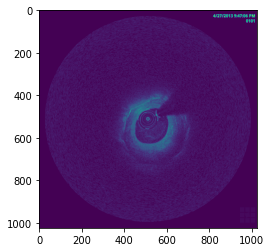

In [ ]:
test_image_1 = pig1[100]
plt.imshow(test_image_1)

In [ ]:
# extract labels from labels spreadsheet
wb = xlrd.open_workbook('/content/drive/My Drive/PlaqueTypeData_Y17M11D11.xlsx')
pig1_labels = wb.sheet_by_index(0) # pig 5298
pig2_labels = wb.sheet_by_index(1) # pig 5303
pig3_labels = wb.sheet_by_index(2) # pig 5320
pig4_labels = wb.sheet_by_index(3) # pig 5563

In [ ]:
# Normal wall = 1, Abnormal wall = 0
pig1_frames = []
pig1_label_bin = []

stop = False
index = 3
while not stop:
  pig1_frames.append('1-{}'.format(int(pig1_labels.cell_value(index, 0))))
  pig1_label_bin.append(int(pig1_labels.cell_value(index, 5)))
  index += 1
  if pig1_labels.cell_value(index, 0) == '':
    stop = True

pig2_frames = []
pig2_label_bin = []

stop = False
index = 3
while not stop:
  pig2_frames.append('2-{}'.format(int(pig2_labels.cell_value(index, 0))))
  pig2_label_bin.append(int(pig2_labels.cell_value(index, 5)))
  index += 1
  if pig2_labels.cell_value(index, 0) == '':
    stop = True

pig3_frames = []
pig3_label_bin = []

stop = False
index = 3
while not stop:
  pig3_frames.append('3-{}'.format(int(pig3_labels.cell_value(index, 0))))
  pig3_label_bin.append(int(pig3_labels.cell_value(index, 5)))
  index += 1
  if pig3_labels.cell_value(index, 0) == '':
    stop = True

pig4_frames = []
pig4_label_bin = []

stop = False
index = 3
while not stop:
  pig4_frames.append('4-{}'.format(int(pig4_labels.cell_value(index, 0))))
  pig4_label_bin.append(int(pig4_labels.cell_value(index, 5)))
  index += 1
  if pig4_labels.cell_value(index, 0) == '':
    stop = True

In [ ]:
pig_frames = pig1_frames + pig2_frames + pig3_frames + pig4_frames
print(len(pig_frames))
pig_label_bin = pig1_label_bin + pig2_label_bin + pig3_label_bin + pig4_label_bin
print(len(pig_label_bin))

167
167


In [ ]:
abnormal = 0
for i in range(len(pig_frames)):
  if pig_label_bin[i] == 0:
    abnormal += 1

print('Abnormal Frames: {}'.format(abnormal))
print('Normal Frame: {}'.format(len(pig_frames) - abnormal))

Abnormal Frames: 139
Normal Frame: 28


In [ ]:
# balancing out normal frames class by adding 111 random normal frames not part of the recorded frames from the pigs
import random
framesperpig = int((139-28)/4)
index = 0
while index != framesperpig:
  tmp = random.randint(0, 270)
  if '1-{}'.format(tmp) not in pig1_frames:
    pig_frames.append('1-{}'.format(tmp))
    pig_label_bin.append(1)
    index += 1
index = 0
while index != framesperpig:
  tmp = random.randint(0, 270)
  if '2-{}'.format(tmp) not in pig2_frames:
    pig_frames.append('2-{}'.format(tmp))
    pig_label_bin.append(1)
    index += 1
index = 0
while index != framesperpig:
  tmp = random.randint(0, 270)
  if '3-{}'.format(tmp) not in pig3_frames:
    pig_frames.append('3-{}'.format(tmp))
    pig_label_bin.append(1)
    index += 1
index = 0
while index != framesperpig:
  tmp = random.randint(0, 270)
  if '4-{}'.format(tmp) not in pig4_frames:
    pig_frames.append('4-{}'.format(tmp))
    pig_label_bin.append(1)
    index += 1

In [ ]:
print(pig_frames[-3:])
print(len(pig_frames))
print(len(pig_label_bin))

['4-250', '4-77', '4-244']
275
275


In [ ]:
abnormal = 0
for i in range(len(pig_frames)):
  if pig_label_bin[i] == 0:
    abnormal += 1

print('Abnormal Frames: {}'.format(abnormal))
print('Normal Frame: {}'.format(len(pig_frames) - abnormal))

Abnormal Frames: 139
Normal Frame: 136


###2. Image Preprocessing 1: Image normalization, cropping to remove annotations and resizing

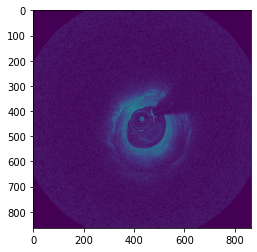

In [ ]:
plt.imshow(test_image_1[80:1024-80,80:1024-80])

In [ ]:
# Image cropping and normalization
pig1_cropped = []
pig2_cropped = []
pig3_cropped = []
pig4_cropped = []

for frame in pig1:
  pig1_cropped.append(frame[80:1024-80,80:1024-80]/255)
for frame in pig2:
  pig2_cropped.append(frame[80:1024-80,80:1024-80]/255)
for frame in pig3:
  pig3_cropped.append(frame[80:1024-80,80:1024-80]/255)
for frame in pig4:
  pig4_cropped.append(frame[80:1024-80,80:1024-80]/255)

pig1_cropped = np.array(pig1_cropped)
print(pig1_cropped.shape)
print(pig1_cropped[0])

(271, 864, 864)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# prepare images
pig_images = []
for frame in pig_frames:
  pigno = frame.split('-')[0]
  if pigno == '1':
    pig_images.append(pig1_cropped[int(frame.split('-')[1])])
  if pigno == '2':
    pig_images.append(pig2_cropped[int(frame.split('-')[1])])
  if pigno == '3':
    pig_images.append(pig3_cropped[int(frame.split('-')[1])])
  if pigno == '4':
    pig_images.append(pig4_cropped[int(frame.split('-')[1])])
 
pig_images = np.array(pig_images)
print(pig_images.shape)

(275, 864, 864)


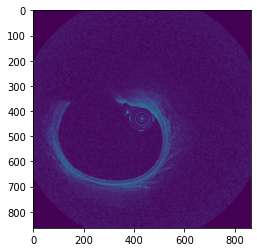

In [ ]:
plt.imshow(pig_images[100])

In [ ]:
# randomize labels and images and then write images to dataset folder
z = list(zip(pig_images, pig_label_bin))
random.shuffle(z)
pig_images, pig_label_bin = zip(*z)

(275, 864, 864)


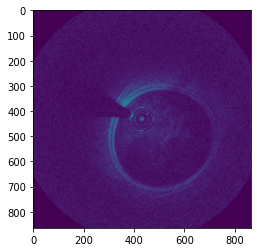

In [ ]:
pig_images = np.array(pig_images)
print(pig_images.shape)
plt.imshow(pig_images[10])

In [ ]:
# writing images to Google drive
!mkdir -p drive/My\ Drive/msc_project/dataset/pigs/cartesian
counter = 0
for image in pig_images:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/pigs/cartesian/{}.png'.format(counter), image, cmap=plt.cm.gray)
# writing labels to txt file on Google drive
with open('drive/My Drive/msc_project/dataset/pigs/labels.txt', 'w') as myfile:
  wr = csv.writer(myfile)
  wr.writerow(pig_label_bin)

In [ ]:
# release memory
pig1_cropped = []
pig2_cropped = []
pig3_cropped = []
pig4_cropped = []
pig_frames = []
pig1_frames = []
pig2_frames = []
pig3_frames = []
pig4_frames = []
pig1 = None
pig2 = None
pig3 = None
pig4= None

###3. Image Preprocessing 2: Sheath Removal- The MATLAB code for sheath removal has been modified for use from the following repository. https://github.com/dmolony3/OCT

Reference: 
1. Evaluation of a framework for the co-registration of intravascular ultrasound and optical coherence tomography coronary artery pullbacks. Molony DS, Timmins LH, Rasoul-Arzrumly E, Samady H, Giddens DP. 2016. J Biomech, Vol 49(16)
2. Volmetric quantification of fibrous caps using intravascular optical coherence tomography. Wang Z, Chamie D, Bezerra HG, Yamamoto H, Kanovsky J, Wilson DL, Costa MA, Rollins AM. 2010. Biomed Optics Express, Vol 3(6)

In [ ]:
# At this stage, important variables are pig_images and pig_label_bin
# load the image and labels data
with open('drive/My Drive/msc_project/dataset/pigs/labels.txt') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    pig_label_bin = row

pig_label_bin = [int(i) for i in pig_label_bin]
print(pig_label_bin)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]


In [ ]:
import os
pig_images = []
for file in os.listdir('drive/My Drive/msc_project/dataset/pigs/cartesian/'):
  pig_images.append(cv2.cvtColor(plt.imread('drive/My Drive/msc_project/dataset/pigs/cartesian/{}'.format(file)), cv2.COLOR_BGR2GRAY))
print(len(pig_images))

275


(864, 864)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


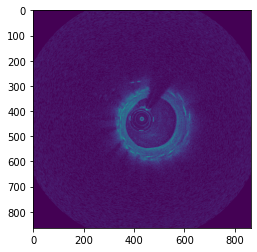

In [ ]:
plt.imshow(pig_images[0])
print(pig_images[0].shape)
print(pig_images[0])

In [ ]:
pig_images = np.array(pig_images)
print(pig_images.shape)

(275, 864, 864)


In [ ]:
# convert cartesian images to polar
def cart2polar(img):
  img = img.astype(np.float32)
  offset = 100
  img = img[offset:img.shape[0]-offset, offset:img.shape[1]-offset]
  value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0)) - 200
  polar_image = cv2.linearPolar(img, (img.shape[0]/2, img.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS)
  return polar_image

# test_image_3 = cart2polar(pig_images[0])
# plt.imshow(test_image_3)
# print(test_image_3)
# print(test_image_3.shape)

In [ ]:
!mkdir -p drive/My\ Drive/msc_project/dataset/pigs/polar
counter = 0
pig_images_polar = []
for image in pig_images:
  counter += 1
  pig_images_polar.append(cart2polar(image))
  #plt.imsave('drive/My Drive/msc_project/dataset/pigs/polar/{}.png'.format(counter), cart2polar(image), cmap=plt.cm.gray)

pig_images_polar = np.array(pig_images_polar)
print(pig_images_polar.shape)

(275, 664, 664)


In [ ]:
# Remove sheath: use txt file generated by MATLAB code to remove sheath region from polar images
data = pandas.read_csv('drive/My Drive/msc_project/dataset/pigs/sheath.txt')
images_sheaths = []
for i in range(len(data.columns)):
  images_sheaths.append(data.iloc[:, i].tolist())

print(len(images_sheaths))
print(images_sheaths[0])

275
[131, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 129, 129, 129, 129, 130, 129, 128, 129, 129, 128, 128, 128, 127, 127, 128, 128, 127, 127, 127, 127, 127, 127, 126, 126, 125, 126, 125, 125, 124, 125, 125, 124, 124, 124, 124, 124, 124, 124, 123, 123, 123, 122, 122, 122, 122, 122, 121, 121, 121, 121, 121, 121, 121, 121, 121, 120, 119, 119, 119, 119, 119, 118, 118, 118, 119, 118, 118, 118, 118, 118, 117, 117, 118, 117, 117, 117, 116, 116, 115, 116, 115, 115, 115, 115, 115, 114, 115, 115, 114, 114, 113, 113, 114, 114, 113, 113, 112, 112, 112, 112, 113, 112, 112, 112, 111, 111, 111, 111, 110, 110, 110, 110, 110, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 108, 107, 107, 108, 108, 108, 108, 108, 107, 107, 107, 107, 108, 107, 107, 107, 107, 107, 107, 106, 106, 107, 106, 106, 106, 107, 107, 106, 106, 107, 106, 106, 106, 106, 106, 105, 105, 105, 106, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 105, 105, 105, 105, 105, 105, 105, 

(275, 539, 539)


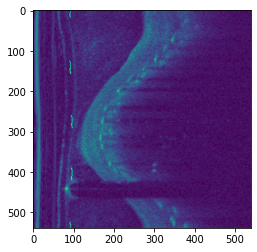

In [ ]:
pig_images_polar_rs = []
for image in pig_images_polar:
  pig_images_polar_rs.append(cv2.resize(image, (539,539)))

pig_images_polar_rs = np.array(pig_images_polar_rs)
print(pig_images_polar_rs.shape)
plt.imshow(pig_images_polar_rs[0])

In [ ]:
# black out the sheath area
for i in range(pig_images_polar_rs.shape[0]):
  for row in range(pig_images_polar_rs.shape[1]):
    for col in range(pig_images_polar_rs.shape[2]):
      if col < images_sheaths[i][row] + 10:
        pig_images_polar_rs[i][row][col] = 0

print(pig_images_polar_rs.shape)

(275, 539, 539)


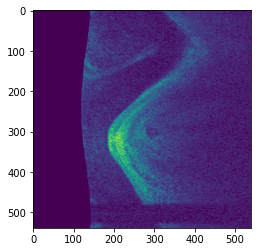

In [ ]:
plt.imshow(pig_images_polar_rs[200])

(275, 539, 539)


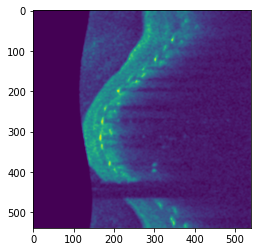

In [ ]:
# apply gaussian blur to all the polar images
pig_images_polar_blur = []
for image in pig_images_polar_rs:
  pig_images_polar_blur.append(cv2.GaussianBlur(image, (5,5), cv2.BORDER_DEFAULT))

pig_images_polar_blur = np.array(pig_images_polar_blur)
print(pig_images_polar_blur.shape)
plt.imshow(pig_images_polar_blur[0]) 

In [ ]:
# preprocessing complete. write resulting images to drive
counter = 0
for image in pig_images_polar_blur:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/pigs/polar/{}.png'.format(counter), image, cmap=plt.cm.gray)
print(counter)

275


###4. Image Augmentation: Increase dataset by flipping/rotating the original cartesian images and preparing their corresponding polar images

In [ ]:
def load_data():
  # pig_images = []
  # for file in os.listdir('drive/My Drive/msc_project/dataset/pigs/cartesian/'):
  #   pig_images.append(cv2.cvtColor(plt.imread('drive/My Drive/msc_project/dataset/pigs/cartesian/{}'.format(file)), cv2.COLOR_BGR2GRAY))
  # pig_images = np.array(pig_images)
  # print(pig_images.shape)
  with open('drive/My Drive/msc_project/dataset/pigs/y.txt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      pig_label_bin = row
  pig_label_bin = [int(i) for i in pig_label_bin]
  pig_images_polar_blur = []
  for file in os.listdir('drive/My Drive/msc_project/dataset/pigs/polar_final/'):
    pig_images_polar_blur.append(cv2.cvtColor(plt.imread('drive/My Drive/msc_project/dataset/pigs/polar_final/{}'.format(file)), cv2.COLOR_BGR2GRAY))
  pig_images_polar_blur = np.array(pig_images_polar_blur)
  print(pig_images_polar_blur.shape)
  plt.imshow(pig_images_polar_blur[0])
  return pig_label_bin, pig_images_polar_blur

(275, 864, 864)
(275, 539, 539)


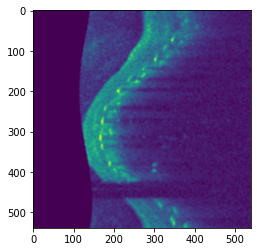

In [ ]:
pig_images, pig_label_bin, pig_images_polar_blur = load_data()

In [ ]:
# create new images that are rotated
rotations = [cv2.ROTATE_180, cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
pig_images_rot = []
for image in pig_images:
  pig_images_rot.append(cv2.rotate(image, rotations[random.randint(0,2)]))
pig_images_rot = np.array(pig_images_rot)
print(pig_images_rot.shape)

(275, 864, 864)


In [ ]:
"""
Repeat all the steps that were performed for the original image set
1. write the cartesian images to drive
2. download the images locally and run through the MATLAB program to obtain sheath removal csv
3. convert to polar images
4. remove sheath
5. blur polar images
6. concatenate the labels
7. concatenate the polar blurred images
8. randomize both x and y variables
"""
!mkdir -p drive/My\ Drive/msc_project/dataset/pigs/cartesian2
counter = 0
for image in pig_images_rot:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/pigs/cartesian2/{}.png'.format(counter), image, cmap=plt.cm.gray)

In [ ]:
# Remove sheath: use txt file generated by MATLAB code to remove sheath region from polar images
data = pandas.read_csv('drive/My Drive/msc_project/dataset/pigs/sheath2.txt')
images_sheaths = []
for i in range(len(data.columns)):
  images_sheaths.append(data.iloc[:, i].tolist())

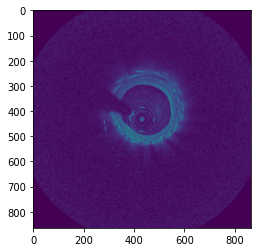

In [ ]:
pig_images_rot = []
for image in os.listdir('drive/My Drive/msc_project/dataset/pigs/cartesian2/'):
  pig_images_rot.append(cv2.cvtColor(plt.imread('drive/My Drive/msc_project/dataset/pigs/cartesian2/{}'.format(image)), cv2.COLOR_BGR2GRAY))
pig_images_rot = np.array(pig_images_rot)
plt.imshow(pig_images_rot[0])

In [ ]:
!mkdir -p drive/My\ Drive/msc_project/dataset/pigs/polar2
pig_images_polar_2 = []
counter = 0
for image in pig_images_rot:
  newimg = cv2.resize(cart2polar(image), (539,539))
  for row in range(newimg.shape[0]):
    for col in range(newimg.shape[1]):
      if col < images_sheaths[counter][row] + 10:
        newimg[row][col] = 0
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/pigs/polar2/{}.png'.format(counter), cv2.GaussianBlur(newimg, (5,5), cv2.BORDER_DEFAULT), cmap=plt.cm.gray)
print(counter)

In [ ]:
# concatenate the two image arrays and labels, randomize and then write
pig_y = []
pig_x = []
pig_y = pig_label_bin + pig_label_bin

pig_images_polar_2_blur = []
for file in os.listdir('drive/My Drive/msc_project/dataset/pigs/polar2/'):
    pig_images_polar_2_blur.append(cv2.cvtColor(plt.imread('drive/My Drive/msc_project/dataset/pigs/polar2/{}'.format(file)), cv2.COLOR_BGR2GRAY))
pig_images_polar_2_blur = np.array(pig_images_polar_2_blur)

print(pig_images_polar_blur.shape)
print(pig_images_polar_2_blur.shape)

pig_x = np.concatenate((pig_images_polar_blur, pig_images_polar_2_blur))
print(pig_x.shape)

z = list(zip(pig_x, pig_y))
random.shuffle(z)
pig_x, pig_y = zip(*z)

print(len(pig_y))

(275, 539, 539)
(275, 539, 539)
(550, 539, 539)
550


In [ ]:
# write final data
!mkdir -p drive/My\ Drive/msc_project/dataset/pigs/polar_final
counter = 0
for image in pig_x:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/pigs/polar_final/{}.png'.format(counter), image, cmap=plt.cm.gray)
with open('drive/My Drive/msc_project/dataset/pigs/y.txt', 'w') as csvfile:
  wr = csv.writer(csvfile)
  wr.writerow(pig_y) 

###5. Data Preparation 2 and Preprocessing: Prepare Human dataset from AVI video files and convert to Polar and apply Gaussian blur

In [ ]:
vidpath = 'drive/My Drive/msc_project/dataset/humans/'
p1 = []
vidcap = cv2.VideoCapture(vidpath + 'p1.avi')
success, image = vidcap.read()
while success:
  p1.append(cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)))
  success, image = vidcap.read()

p2 = []
vidcap = cv2.VideoCapture(vidpath + 'p2.avi')
success, image = vidcap.read()
while success:
  p2.append(cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)))
  success, image = vidcap.read()

p3 = []
vidcap = cv2.VideoCapture(vidpath + 'p3.avi')
success, image = vidcap.read()
while success:
  p3.append(cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)))
  success, image = vidcap.read()

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

(375, 1024, 1024)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


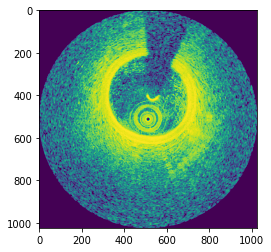

In [ ]:
print(p1.shape)
plt.imshow(p1[0])
print(p1[0])

(375, 1024, 1024)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


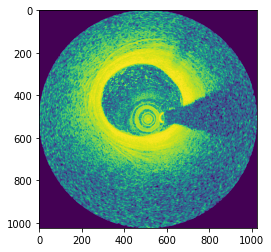

In [ ]:
print(p2.shape)
plt.imshow(p2[0])
print(p2[0])

(374, 1024, 1024)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


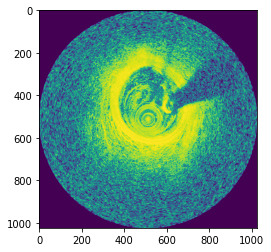

In [ ]:
print(p3.shape)
plt.imshow(p3[0])
print(p3[0])

In [ ]:
!pip install odfpy
import math
human_label_df = pandas.read_excel('drive/My Drive/msc_project/dataset/humans/plaques.ods', engine="odf")
print(human_label_df.columns)

p1_pos = human_label_df.iloc[:,0].tolist()
print(p1_pos)
p1_images = []
for index in p1_pos:
  p1_images.append(p1[int(index)])
p1_images = np.array(p1_images)
print(p1_images.shape)

p2_pos = human_label_df.iloc[:,1].tolist()
print(p2_pos)
p2_images = []
for index in p2_pos:
  if not math.isnan(index):
    p2_images.append(p2[int(index)])
p2_images = np.array(p2_images)
print(p2_images.shape)

p3_pos = human_label_df.iloc[:,2].tolist()
print(p3_pos)
p3_images = []
for index in p3_pos:
  if not math.isnan(index):
    p3_images.append(p3[int(index)])
p3_images = np.array(p3_images)
print(p3_images.shape)

     |████████████████████████████████| 727kB 4.6MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=adc84f20bec977efb450c091285000ef4baf999e674dd2db302ff72a3974c308
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy
Int64Index([30, 7, 172], dtype='int64')
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178

In [ ]:
human_images_neg = np.concatenate((p1_images, p2_images, p3_images))
print(human_images_neg.shape)

(472, 1024, 1024)


In [ ]:
p1_pos = [int(i) for i in p1_pos if not math.isnan(i)]
print(p1_pos)
p2_pos = [int(i) for i in p2_pos if not math.isnan(i)]
p3_pos = [int(i) for i in p3_pos if not math.isnan(i)]

# load positive (normal wall/no plaque images)
p1_images_pos = []
for i in range(p1.shape[0]):
  if i not in p1_pos:
    p1_images_pos.append(p1[i])
  
p1_images_pos = np.array(p1_images_pos)
print(p1_images_pos.shape)

p2_images_pos = []
for i in range(p2.shape[0]):
  if i not in p2_pos:
    p2_images_pos.append(p2[i])
  
p2_images_pos = np.array(p2_images_pos)
print(p2_images_pos.shape)

p3_images_pos = []
for i in range(p3.shape[0]):
  if i not in p3_pos:
    p3_images_pos.append(p3[i])
  
p3_images_pos = np.array(p3_images_pos)
print(p3_images_pos.shape)

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279

In [ ]:

human_images_pos = random.sample(list(p1_images_pos), 81) + random.sample(list(p2_images_pos), 215) + random.sample(list(p3_images_pos), 159)
human_images_pos = np.array(human_images_pos)
print(human_images_pos.shape)

(455, 1024, 1024)


In [ ]:
# create labels
humans_y = []
for i in range(472):
  humans_y.append(0)
for i in range(455):
  humans_y.append(1)

(927, 1024, 1024)


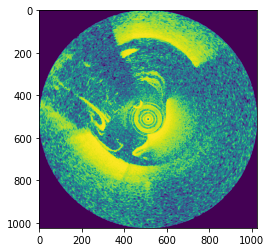

In [ ]:
humans_x = np.concatenate((human_images_neg, human_images_pos))

# randomize dataset
z = list(zip(humans_x, humans_y))
random.shuffle(z)
humans_x, humans_y = zip(*z)

humans_x = np.array(humans_x)
print(humans_x.shape)
plt.imshow(humans_x[100])

In [ ]:
humans_x_cart = humans_x

(927, 824, 824)


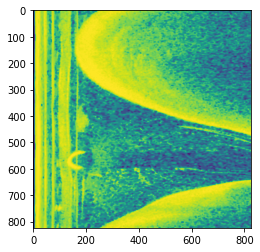

In [ ]:
# convert images to polar and apply gaussian blur
humans_x_pol = []
for i in range(humans_x.shape[0]):
  humans_x_pol.append(cv2.GaussianBlur(cart2polar(humans_x[i]), (5,5), cv2.BORDER_DEFAULT))

humans_x_pol = np.array(humans_x_pol)
print(humans_x_pol.shape)
plt.imshow(humans_x_pol[10])

In [ ]:
# write the labels, polar images and cartesian images to drive
!mkdir -p drive/My\ Drive/msc_project/dataset/humans/polar
!mkdir -p drive/My\ Drive/msc_project/dataset/humans/cartesian

counter = 0
for image in humans_x_cart:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/humans/cartesian/{}.png'.format(counter), image, cmap=plt.cm.gray)

counter = 0
for image in humans_x_pol:
  counter += 1
  plt.imsave('drive/My Drive/msc_project/dataset/humans/polar/{}.png'.format(counter), image, cmap=plt.cm.gray)

with open('drive/My Drive/msc_project/dataset/humans/label.txt', 'w') as csvfile:
  wr = csv.writer(csvfile)
  wr.writerow(humans_y)

###6. Model 1: Resnet 50 pre trained on Imagenet

In [18]:
from keras.layers import Input
from keras import layers
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D, GlobalMaxPool2D, ZeroPadding2D
from keras.layers import AveragePooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.engine.topology import get_source_inputs
from keras.applications import ResNet50
from keras.models import Sequential

In [ ]:


NUM_CLASSES = 2
CHANNELS = 1

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100
BATCH_SIZE_TESTING = 1


In [ ]:
resnet_weights_path = './drive/My\ Drive/msc_project/weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet', input_shape=(539, 539, 3)))
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
model.layers[0].trainable = False
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


###7. Train the pig data on ResNet 50 pretrained model

(550, 539, 539)


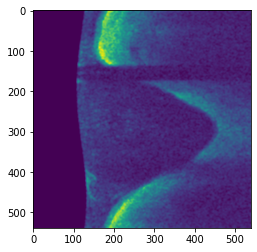

In [ ]:
# load pig data
pig_labels_bin, pig_images_pol = load_data()

In [ ]:
# prep data for the model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(pig_images_pol, pig_labels_bin, test_size = 0.15)
print(x_train.shape)
print(len(y_train))
print(y_train[0])

(467, 539, 539)
467
1


(467, 539, 539, 3)
[1. 0.]


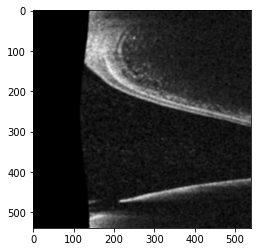

In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_val = np.repeat(x_val[..., np.newaxis], 3, -1)

y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_val = np_utils.to_categorical(y_val, NUM_CLASSES)

print(x_train.shape)
plt.imshow(x_train[0])
print(y_train[0])

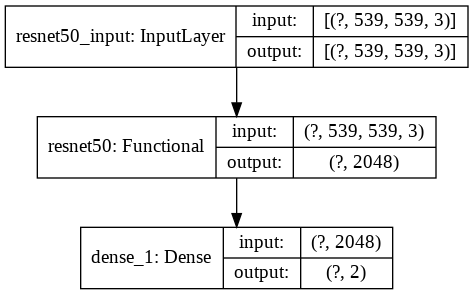

In [ ]:
from keras import optimizers
from keras.utils import plot_model
# changing the learning rate did not have any affect on the model accuracy
sgd = optimizers.SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer='rmsprop', loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)
plot_model(model, to_file='resnet50_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = './drive/My\ Drive/msc_project/weights/resnet50_pig/best.hdf5', monitor = 'val_acc', save_best_only = True, mode = 'auto')

In [ ]:
history = model.fit(x = x_train, y = y_train, batch_size = BATCH_SIZE_TRAINING, epochs = NUM_EPOCHS, verbose = 1, callbacks= [checkpoint], validation_data = (x_val, y_val))

Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 1.1762 - accuracy: 0.4732 - val_loss: 0.7408 - val_accuracy: 0.4337
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.7014 - accuracy: 0.5075 - val_loss: 0.7614 - val_accuracy: 0.5663
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 0.8199 - accuracy: 0.4946 - val_loss: 0.9034 - val_accuracy: 0.4337
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 0.7630 - accuracy: 0.5268 - val_loss: 0.7334 - val_accuracy: 0.4337
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 0.7427 - accuracy: 0.4968 - val_loss: 0.8372 - val_accuracy: 0.5663
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.7905 - accuracy: 0.5246 - val_loss: 0.7871 - val_accuracy: 0.4337
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.7750 - accuracy: 0.5139 - val_loss: 0.6892 - val_accuracy: 0.5663
Epoch 8/10
5/5 [=========================

{'loss': [1.1761581897735596, 0.7014485597610474, 0.8198530077934265, 0.7630437612533569, 0.7426789402961731, 0.7905316948890686, 0.7750374674797058, 0.7580146789550781, 0.9516378045082092, 0.7229561805725098], 'accuracy': [0.4732334017753601, 0.5074946284294128, 0.49464666843414307, 0.5267665982246399, 0.49678799510002136, 0.5246252417564392, 0.5139186382293701, 0.5032119750976562, 0.44111350178718567, 0.49678799510002136], 'val_loss': [0.740818440914154, 0.7614469528198242, 0.9034348726272583, 0.733391523361206, 0.8372451663017273, 0.7870572805404663, 0.6892028450965881, 0.8109434843063354, 0.6878169178962708, 0.6961914300918579], 'val_accuracy': [0.4337349534034729, 0.5662650465965271, 0.4337349534034729, 0.4337349534034729, 0.5662650465965271, 0.4337349534034729, 0.5662650465965271, 0.4337349534034729, 0.5662650465965271, 0.5662650465965271]}


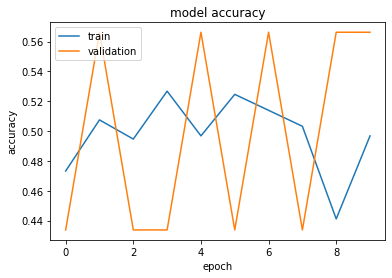

In [ ]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###8. Train the pig data on ResNet 50 from scratch

In [ ]:
model2 = Sequential()
model2.add(ResNet50(include_top=False, weights=None, input_shape=(539, 539, 1), pooling = RESNET50_POOLING_AVERAGE,))
model2.add(Dense(NUM_CLASSES, activation=DENSE_LAYER_ACTIVATION))
model2.summary()

model2.compile(optimizer='rmsprop', loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)
checkpoint = ModelCheckpoint(filepath = './drive/My\ Drive/msc_project/weights/resnet50_pig/best.hdf5', monitor = 'val_accuracy', save_best_only = True, mode = 'auto')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23581440  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 4098      
Total params: 23,585,538
Trainable params: 23,532,418
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)

y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_val = np_utils.to_categorical(y_val, NUM_CLASSES)


In [ ]:
print(x_train.shape)
history2 = model2.fit(x = x_train, y = y_train, batch_size = 20, epochs = NUM_EPOCHS, verbose = 1, callbacks= [checkpoint], validation_data = (x_val, y_val))

(467, 539, 539, 1)
Epoch 1/10
24/24 [==============================] - 27s 1s/step - loss: 1.4187 - accuracy: 0.5289 - val_loss: 0.6989 - val_accuracy: 0.4819
Epoch 2/10
24/24 [==============================] - 26s 1s/step - loss: 0.7490 - accuracy: 0.5503 - val_loss: 0.6950 - val_accuracy: 0.5181
Epoch 3/10
24/24 [==============================] - 27s 1s/step - loss: 1.0005 - accuracy: 0.5096 - val_loss: 346.0767 - val_accuracy: 0.4819
Epoch 4/10
24/24 [==============================] - 27s 1s/step - loss: 0.8762 - accuracy: 0.5118 - val_loss: 7.9890 - val_accuracy: 0.4819
Epoch 5/10
24/24 [==============================] - 27s 1s/step - loss: 0.7687 - accuracy: 0.4604 - val_loss: 0.8112 - val_accuracy: 0.4819
Epoch 6/10
24/24 [==============================] - 27s 1s/step - loss: 0.8930 - accuracy: 0.5032 - val_loss: 1830.1334 - val_accuracy: 0.4819
Epoch 7/10
24/24 [==============================] - 27s 1s/step - loss: 0.8103 - accuracy: 0.4497 - val_loss: 147.8624 - val_accuracy: 0

{'loss': [1.4187334775924683, 0.7490051984786987, 1.0004591941833496, 0.8761770725250244, 0.7686625123023987, 0.8929620385169983, 0.8103053569793701, 0.7704543471336365, 1.0405910015106201, 0.794732391834259], 'accuracy': [0.5289078950881958, 0.5503212213516235, 0.5096359848976135, 0.5117772817611694, 0.46038544178009033, 0.5032119750976562, 0.44967880845069885, 0.49250534176826477, 0.4882226884365082, 0.49892932176589966], 'val_loss': [0.6988851428031921, 0.6949934363365173, 346.07666015625, 7.989046573638916, 0.8111611604690552, 1830.1334228515625, 147.8623809814453, 3.801051378250122, 174.25665283203125, 17.746971130371094], 'val_accuracy': [0.4819277226924896, 0.5180723071098328, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896, 0.4819277226924896]}


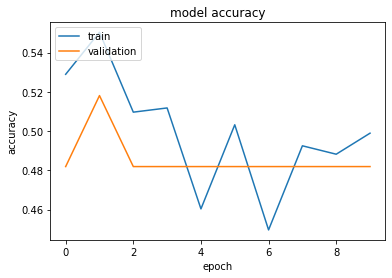

In [ ]:
print(history2.history)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###9. Train Pig data on pre trained VGG19: Freeze first 3 blocks and train blocks 4 and 5 on pig dataset

In [ ]:
from keras.applications import VGG19

(467, 539, 539, 3)
[0. 1.]


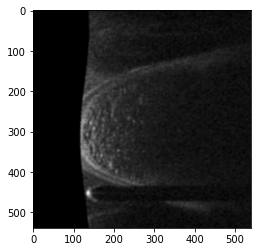

In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_val = np.repeat(x_val[..., np.newaxis], 3, -1)

y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_val = np_utils.to_categorical(y_val, NUM_CLASSES)

print(x_train.shape)
plt.imshow(x_train[0])
print(y_train[0])

In [19]:
def create_model():
    img_input = Input(shape=(539, 539, 3))

    # Block 1
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv1', trainable=False)(img_input)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block1_pool', trainable=False)(x)

    #Block 2
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv1',trainable=False)(x)
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block2_pool', trainable=False)(x)

    #Block 3
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv1',trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv2', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv3', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv4', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block3_pool', trainable=False)(x)

    #Block 4
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv1')(x)
    x = BatchNormalization(name='block4_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv2')(x)
    x = BatchNormalization(name='block4_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv3')(x)
    x = BatchNormalization(name='block4_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block4_pool')(x)

    #Block 5
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv1')(x)
    x = BatchNormalization(name='block5_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv2')(x)
    x = BatchNormalization(name='block5_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv3')(x)
    x = BatchNormalization(name='block5_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block5_pool')(x)
    
    #Other layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout_1')(x)
    x = Dense(1000, activation='relu', name='fc2')(x)
    x = Dropout(0.7, name='dropout_2')(x)
    x = Dense(512, activation='relu', name='fc3')(x)
    x = Dropout(0.5, name='dropout_3')(x)
    x = Dense(1, activation='sigmoid', name='predictions')(x)
    
    model = Model(inputs=img_input, outputs=x)
    return model

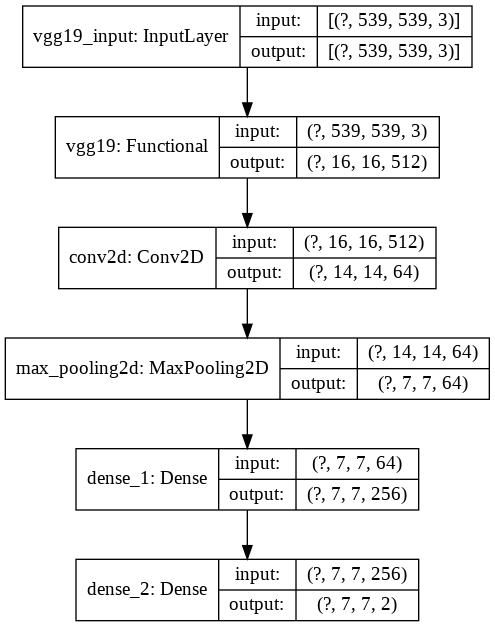

In [ ]:
from keras.utils import plot_model
model3.compile(optimizer='rmsprop', loss = OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)
plot_model(model3, to_file='vgg19_model_plot.png', show_shapes=True, show_layer_names=True)